In [1]:
from matplotlib import pyplot as plt
import numpy as np

from sigproc_kit import *

from my_utils import *

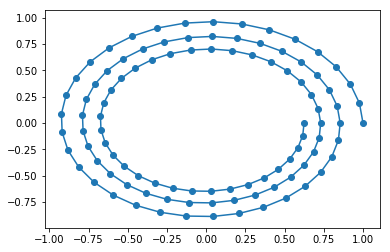

In [2]:
t = np.linspace(0, 3*2*np.pi, 100)
tau = 40
x = np.cos(t) * np.exp(-t/tau)
y = np.sin(t) * np.exp(-t/tau)

plt.scatter(x,y)
plt.plot(x,y)

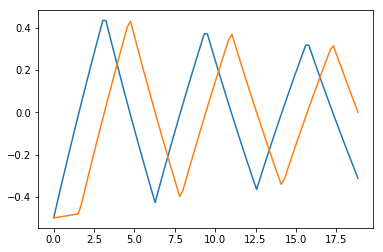

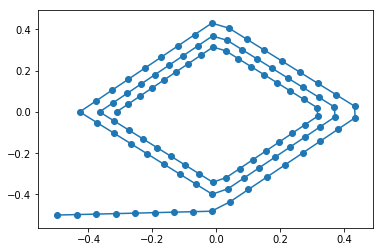

In [3]:
steepness=np.pi*1
width=np.pi
p = t*0
q = t*0
for i in range(10):
    p += square_pulse(t,leading_edge=steepness,trailing_edge=steepness,width=width,delay=i*2*np.pi)
    q += square_pulse(t,leading_edge=steepness,trailing_edge=steepness,width=width,delay=i*2*np.pi+np.pi/2)

p = (p-0.5)*np.exp(-t/tau)
q = (q-0.5)*np.exp(-t/tau)
plt.plot(t,p)
plt.plot(t,q)

plt.show()

plt.scatter(p,q)
plt.plot(p,q)

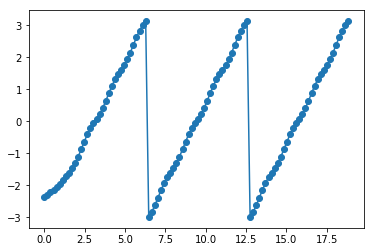

In [4]:
plt.scatter(t,np.arctan2(q,p))
plt.plot(t,np.arctan2(q,p))

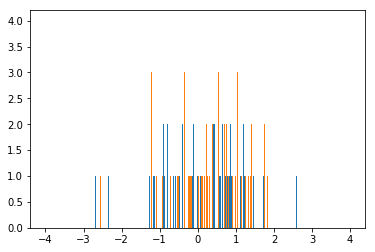

In [5]:
gauss1_samples = np.random.randn(128)
gauss2_samples = np.random.randn(128)

mybins=np.arange(-4,4,0.01)
hist1 = plt.hist(gauss1_samples, bins=mybins)
hist2 = plt.hist(gauss2_samples, bins=mybins)
x = hist1[1]
gauss1 = hist1[0]
gauss2 = hist2[0]

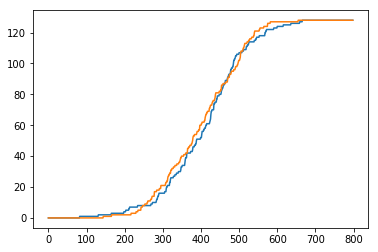

In [6]:
plt.plot(np.cumsum(gauss1))
plt.plot(np.cumsum(gauss2))

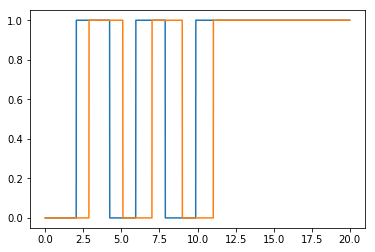

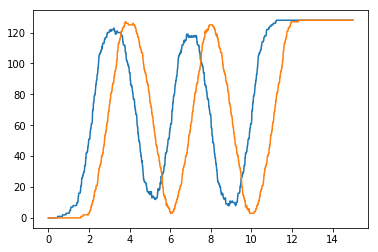

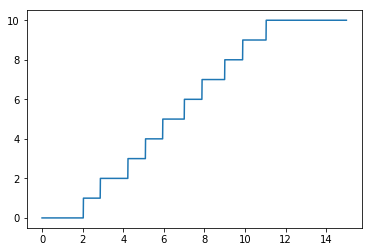

In [7]:
xscale=2

x = np.arange(0,20,10e-3/xscale)
y1 = np.zeros(len(x))
y2 = np.zeros(len(x))
y3 = np.zeros(len(x))


fuzzx = 15*xscale


sign1 = 1;
sign2 = 1;

for i in range(10):
    pos =  int(200*xscale + 100*xscale*i + np.random.randn()*fuzzx)
    if i % 2 == 0:
        y1[pos] += sign1
        sign1 *= -1
    else:
        y2[pos] += sign2
        sign2 *= -1
    y3[pos] += 1
        
    
xor1 = np.cumsum(y1)
xor2 = np.cumsum(y2)
coarse = np.cumsum(y3)

plt.plot(x,xor1)
plt.plot(x,xor2)

plt.show()

chain1 = np.convolve(xor1,gauss1,mode="same")
chain2 = np.convolve(xor2,gauss2,mode="same")

# crop it

mask = (x<15)

x = x[mask]
chain1 = chain1[mask]
chain2 = chain2[mask]
coarse = coarse[mask]

plt.plot(x,chain1)
plt.plot(x,chain2)
plt.show()
plt.plot(x,coarse)




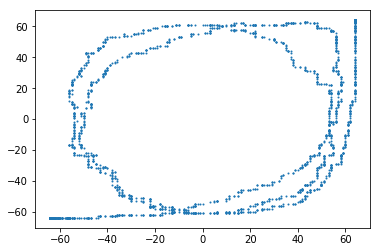

In [8]:
#%matplotlib notebook

small_figure()

I = chain1-64
Q = chain2-64

plt.scatter(I,Q,s=1)
plt.show()



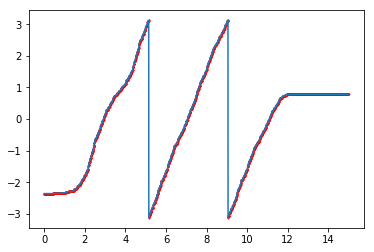

In [9]:
#%matplotlib notebook
phi = np.arctan2(Q,I)

plt.scatter(x,phi,s=1,c="red")
plt.plot(x,phi)
plt.show()

In [103]:

rot_center_lookup = np.array([])
rot_center_cnt = 0

rot_edge_lookup = np.array([])
rot_edge_cnt = 0

last_entries_center = 0
last_entries_edge = 0

for i in range(11):
    mask = (coarse == i)
    phiset=phi[mask]
    #plt.hist(phiset,bins=np.arange(-3.2,3.2,.1))
    #plt.show()
    
    center_mask = np.abs(phiset) < (np.pi/4.) 
    center_set = phiset[center_mask]
    entries_center = len(center_set)
    
    edge_mask = np.abs(phiset) > (np.pi*3./4.) 
    edge_set = phiset[edge_mask]
    entries_edge = len(edge_set)
    
    # population of center region cleared
    if (last_entries_center > 0) and (entries_center == 0):
        rot_center_cnt +=1
    
    # population of edge region cleared
    if (last_entries_edge > 0) and (entries_edge == 0):
        rot_edge_cnt +=1
    
    rot_center_lookup = np.append(rot_center_lookup,[rot_center_cnt])
    rot_edge_lookup = np.append(rot_edge_lookup,[rot_edge_cnt])
    
    
    last_entries_center = entries_center
    last_entries_edge   = entries_edge
    
    
#plt.plot(entries_center,label="entries center")
#plt.plot(entries_edge,label="entries edge")
#
#plt.legend()
#plt.show()
#    
#center_populated = entries_center >0
#edge_populated = entries_edge >0
#
#    
#plt.plot(center_populated,label="center populated")
#plt.plot(edge_populated,label="edge populated")
#plt.plot(rotations_lookup,label="rotations_lookup")
#
#plt.legend()
#plt.show()

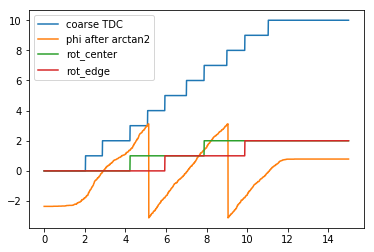

In [104]:
# rotations is increased when we go from center populated to center unpopulated


rot_center = np.array([ rot_center_lookup[int(x)] for x in coarse ])
rot_edge = np.array([ rot_edge_lookup[int(x)] for x in coarse ])

plt.plot(x,coarse,label="coarse TDC")
plt.plot(x,phi,label="phi after arctan2")
plt.plot(x,rot_center,label="rot_center")
plt.plot(x,rot_edge,label="rot_edge")
plt.legend()
plt.show()

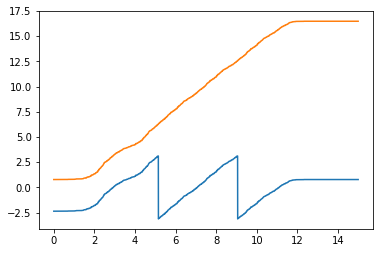

In [107]:
def cont_phi(phi,coarse,rot_center,rot_edge):
    
    new_phi = np.zeros(len(phi))
    
    for i, phival in enumerate(phi):
        phi_mod  = phival % np.pi
        
        if phival >= 0: # positive angles
            new_phi[i] = phival  + rot_edge[i]*2*np.pi
        else: # negative angles
            new_phi[i] = phival  + rot_center[i]*2*np.pi
        
        
        
    return new_phi + np.pi

new_phi = cont_phi(phi,coarse,rot_center,rot_edge)

plt.plot(x,phi)
plt.plot(x,new_phi)
        
        